**Source: IBM GPXX04XJEN
SPAM classification task in Cybersecurity**

Melakukan proses deteksi pesan SPAM dengan menerapkan modeling (Machine Learning dan Deep Learning) menggunakan interface NLP dan Network Security

Tujuan lain yang akan dicapai adalah:
1. membangun model klasifikasi terbaik dan cepat dalam kumpulan data SMS Spam Collection dengan pekerjaan interface model layer-by-layer.
2. membuat laporan metrics dan performa dari evaluasi model.
3. meningkatkan metrics dan performa model dan testing model dengan fine-tune hyperparameter dalam menghasilkan model prediksi yang sesuai dan hasil lebi baik.
4. membuat sebuah hasil report visual guna melihat sebuah insight dan hasil analisis dari data yang di olah.

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://skills.network/logos/SN_web_lightmode.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 520px; height: auto;"></div>')

**Downloading Data**

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_DL_spam_classification_L4/spam.csv

--2024-09-13 14:38:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_DL_spam_classification_L4/spam.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.37MB/s    in 0.3s    

2024-09-13 14:38:09 (1.37 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
!pip install nltk
!pip install wordcloud
!pip install tensorflow==2.4

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.4


In [ ]:
import nltk, re, collections, pickle, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Machine Learning Algorithm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential



from logging import warning
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('ggplot')
seed = 30

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore', category=Warning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]

    plt.figure(figsize = (12, 5), dpi = 100)
    COLOR = 'gray'
    plt.rc('legend', fontsize = 14)
    plt.rc('figure', titlesize = 12)

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)


    ## Loss
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()


    ## Accuracy
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(format(history.history[l][-1],'.4f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(format(history.history[l][-1],'.4f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_conf_matr(conf_matr, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.winter):
  import itertools

  accuracy = np.trace(conf_matr) / np.sum(conf_matr).astype('float')
  sns.set(font_scale = 1.4)

  plt.figure(figsize = (12, 8))
  plt.imshow(conf_matr, interpolation = 'nearest', cmap = cmap)
  title = '\n' + title + '\n'
  plt.title(title)
  plt.colorbar()

  if classes is not None:
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation = 45)
      plt.yticks(tick_marks, classes)

  if normalize:
      conf_matr = conf_matr.astype('float') / conf_matr.sum(axis = 1)[:, np.newaxis]


  thresh = conf_matr.max() / 1.5 if normalize else conf_matr.max() / 2
  for i, j in itertools.product(range(conf_matr.shape[0]), range(conf_matr.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.2f}%".format(conf_matr[i, j] * 100),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(conf_matr[i, j]),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\n\nAccuracy = {:0.2f}%; Error = {:0.2f}%'.format(accuracy * 100, (1 - accuracy) * 100))
  plt.show()


def plot_words(set, number):
  words_counter = collections.Counter([word for sentence in set for word in sentence.split()])
  most_counted = words_counter.most_common(number)
  most_count = pd.DataFrame(most_counted, columns = ["Words", "Amount"]).sort_values(by = "Amount")
  most_count.plot.barh(x = "Words",
                       y = "Amount",
                       color = "blue",
                       figsize = (10, 15))
  for i, v in enumerate(most_count["Amount"]):
    plt.text(v, i,
             " " + str(v),
             color = 'black',
             va = 'center',
             fontweight = 'bold')

def word_cloud(tag):
  df_words_nl = ' '.join(list(df_spam[df_spam['feature'] == tag]['message']))
  df_wc_nl = WordCloud(width = 600, height = 512).generate(df_words_nl)
  plt.figure(figsize = (13, 9), facecolor = 'k')
  plt.imshow(df_wc_nl)
  plt.axis('off')
  plt.tight_layout(pad = 1)
  plt.show()

**Data Manipulation and EDA**

In [ ]:
df_spam = pd.read_csv('/content/spam.csv', encoding='latin-1')
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df_spam = df_spam.filter(['v1', 'v2'], axis = 1)
df_spam.columns = ['feature', 'message']
df_spam.drop_duplicates(inplace = True, ignore_index = True)
print('Number of null values:\n')
df_spam.isnull().sum()

Number of null values:



,0
feature,0
message,0


In [ ]:
df_spam

,feature,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df_spam['feature'].value_counts()

,count
feature,
ham,4516
spam,653


In [ ]:
df_spam.describe()

,feature,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


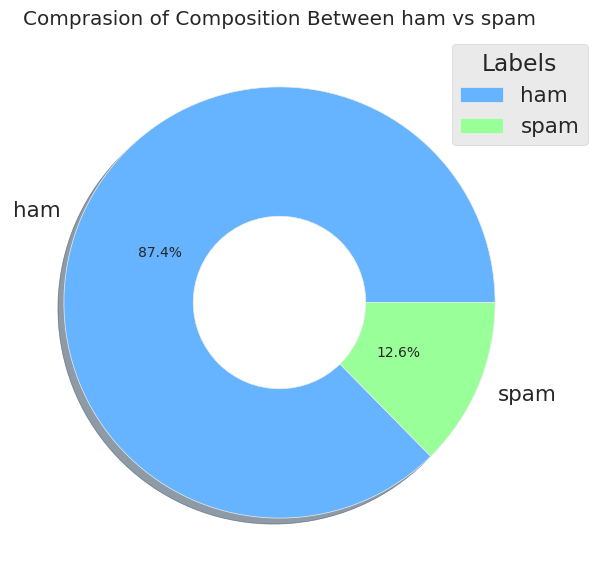

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(df_spam['feature'].value_counts(),
        labels = ['ham', 'spam'],
        autopct = '%0.1f%%',
        colors = ['#66b3ff',
                 '#99ff99'],
        shadow=True)
centre_circle = plt.Circle((0, 0),
                           0.40,
                           fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(title='Labels',
           loc='best',
           bbox_to_anchor=(0.8, 1))
plt.title('Comprasion of Composition Between ham vs spam')
plt.show()

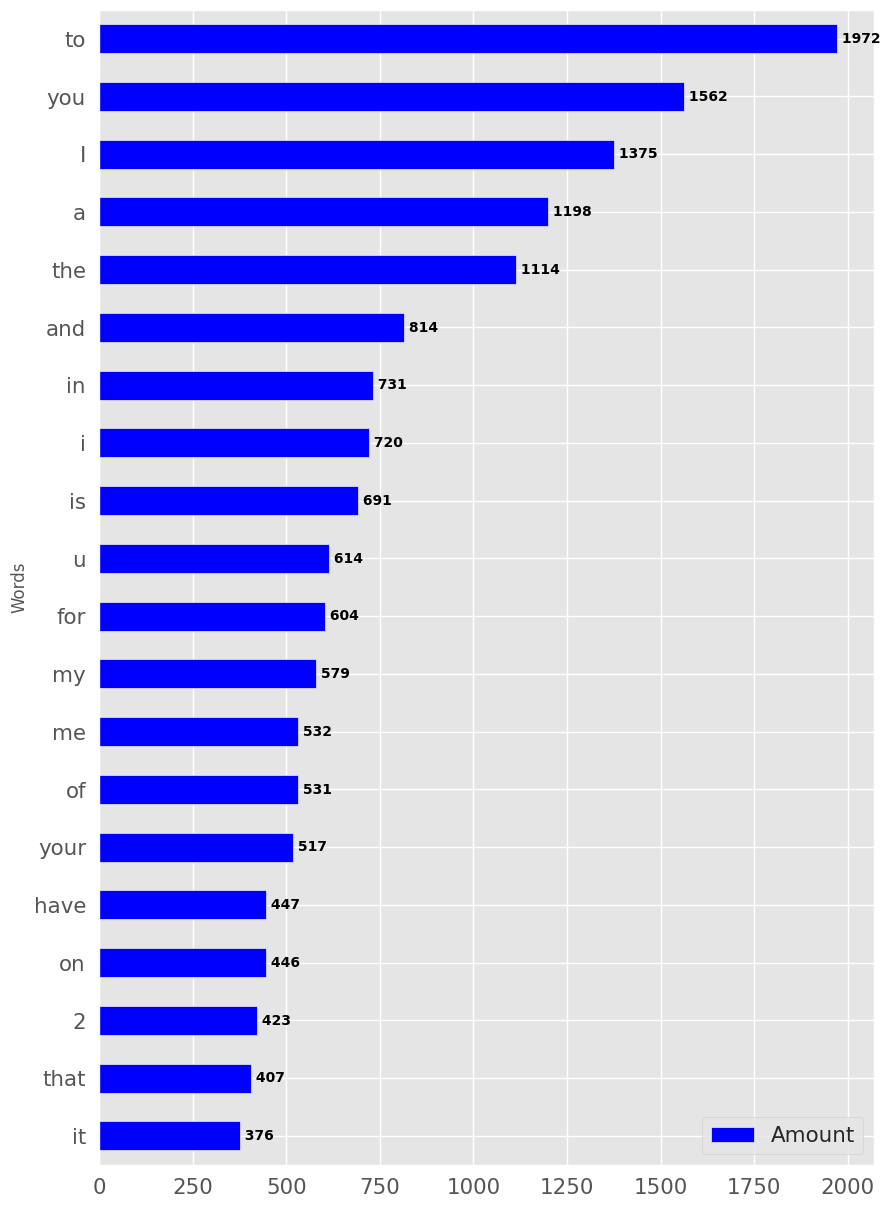

In [ ]:
plot_words(df_spam['message'], number=20)

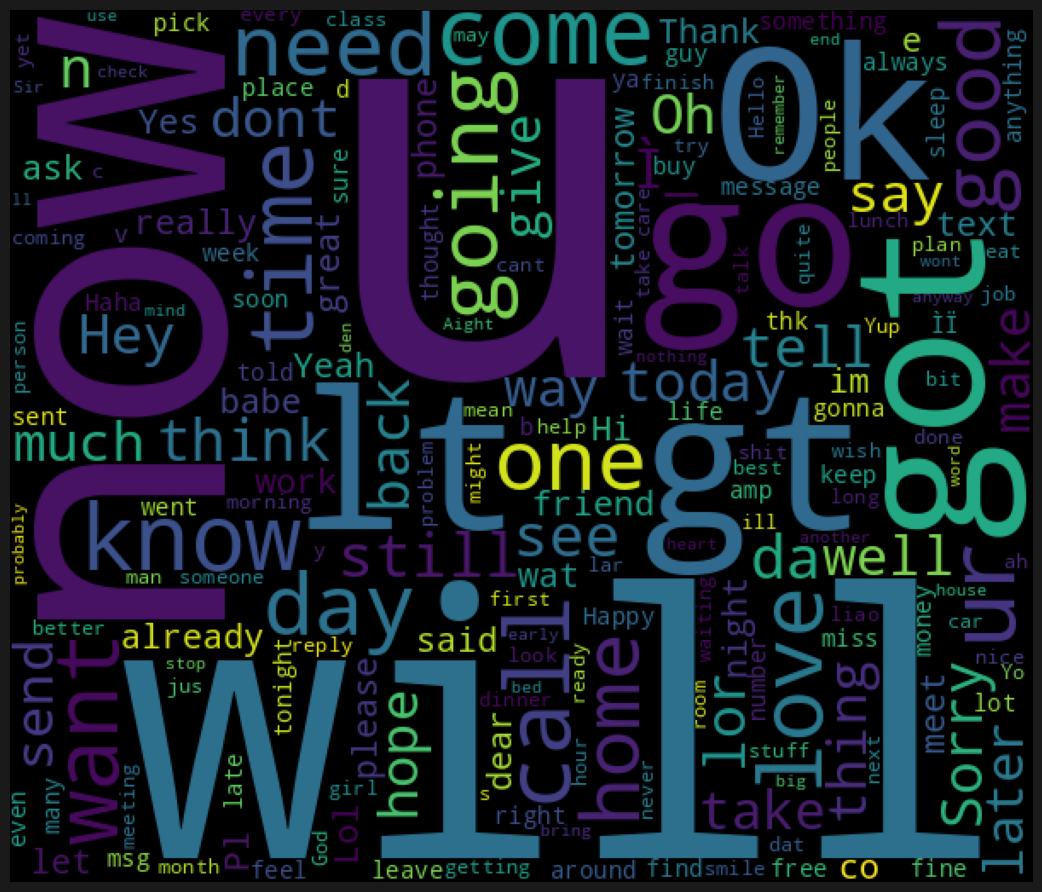

In [ ]:
word_cloud('ham')

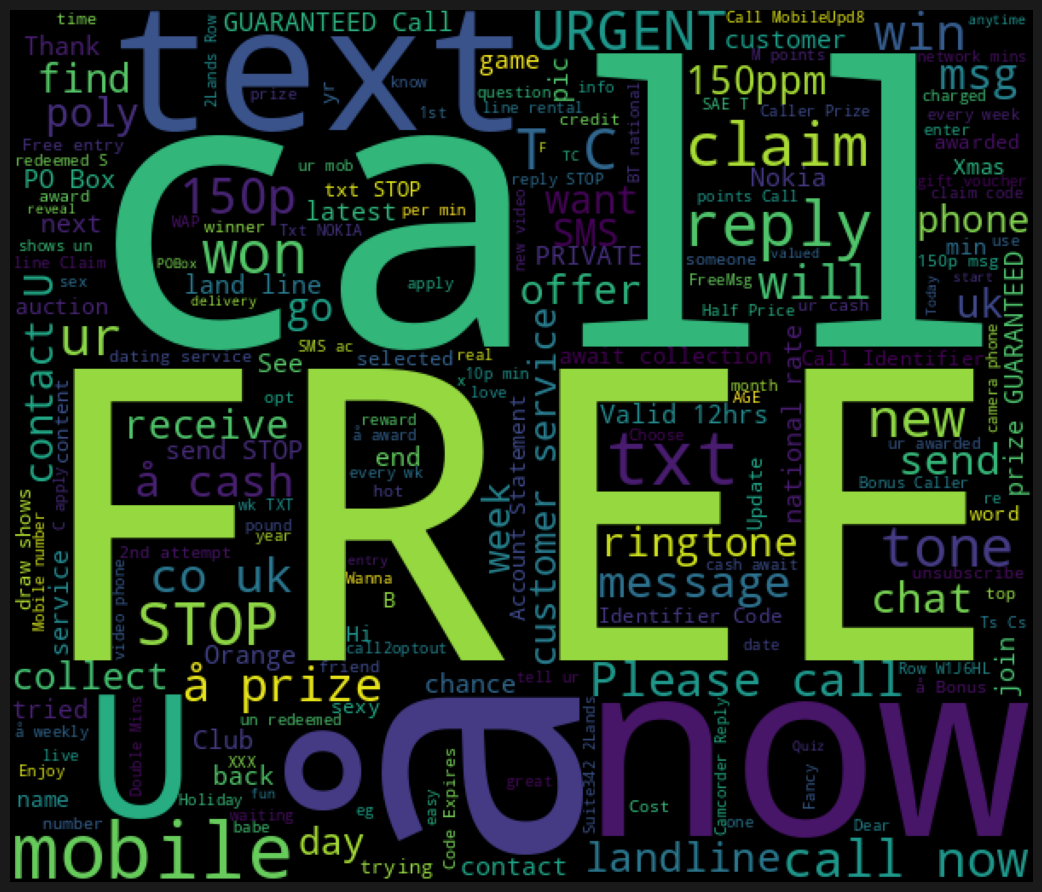

In [ ]:
word_cloud('spam')

In [ ]:
size_vocabulary = 2200
embedding_dimension = 100
trunc_type = 'post'
padding_type = 'post'
treshold = 0.6
oov_token = "OOV"
test_size, valid_size = 0.05, 0.25
num_epochs = 12
drop_level = 0.3

In [ ]:
print("\t\tStage I. Preliminary actions. Preparing of needed sets\n")
full_df_l = []
lemmatizer = WordNetLemmatizer()
for i in range(df_spam.shape[0]):
    mess_1 = df_spam.iloc[i, 1]
    mess_1 = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', mess_1)
    mess_1 = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', mess_1)
    mess_1 = re.sub('£|\$', 'moneysymb', mess_1)
    mess_1 = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', mess_1)
    mess_1 = re.sub('\d+(\.\d+)?', 'numbr', mess_1)
    mess_1 = re.sub('[^\w\d\s]', ' ', mess_1)
    mess_1 = re.sub('[^A-Za-z]', ' ', mess_1).lower()
    token_messages = word_tokenize(mess_1)
    mess = []
    for word in token_messages:
        if word not in set(stopwords.words('english')):
            mess.append(lemmatizer.lemmatize(word))
    txt_mess = " ".join(mess)
    full_df_l.append(txt_mess)

		Stage I. Preliminary actions. Preparing of needed sets



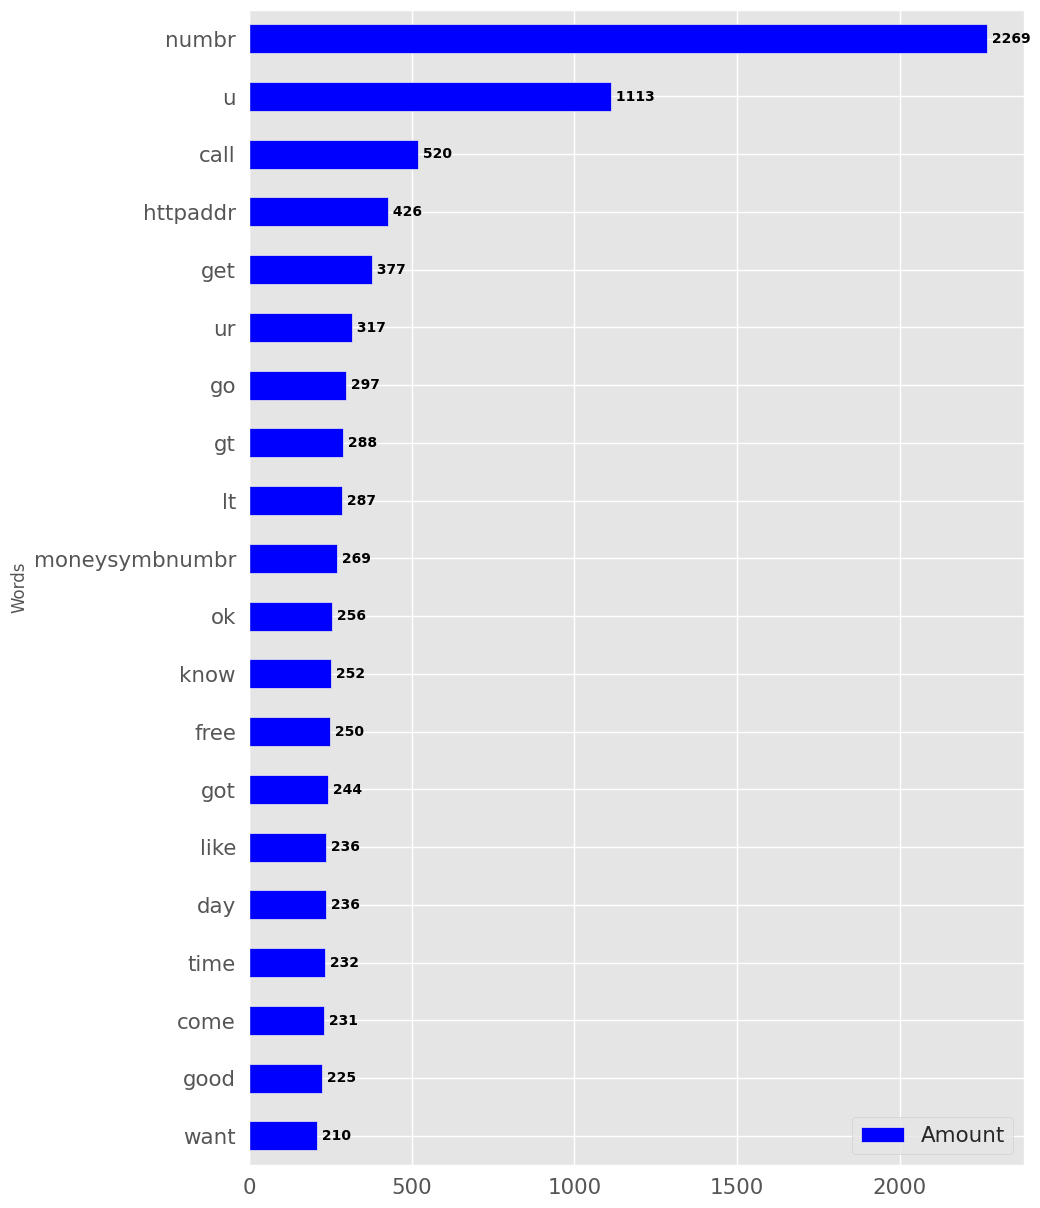

In [ ]:
plot_words(full_df_l, number=20)

In [ ]:
add_df = CountVectorizer(max_features = size_vocabulary)
x = add_df.fit_transform(full_df_l).toarray()
y = df_spam.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(test_size + valid_size), random_state = seed)
print('Number of rows in test set: ' + str(x_test.shape))
print('Number of rows in training set: ' + str(x_train.shape))

Number of rows in test set: (1551, 2200)
Number of rows in training set: (3618, 2200)


**1. Naive Bayes Classifier**

In [ ]:
nb_gaussian = GaussianNB().fit(x_train, y_train)
y_pred_nb_gaussian = nb_gaussian.predict(x_test)
c_m_nb_gaussian = confusion_matrix(y_test, y_pred_nb_gaussian)
c_r_nb_gaussian = classification_report(y_test, y_pred_nb_gaussian)
print('\t\tStage IIa. Gaussian Naive Bayes\n')
print('The first two Predicted Labels:', y_pred_nb_gaussian[0], y_pred_nb_gaussian[2], '\n')
print('\t\t\tClassification Report:\n\n', c_r_nb_gaussian, '\n')

		Stage IIa. Gaussian Naive Bayes

The first two Predicted Labels: ham spam 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.98      0.86      0.92      1340
        spam       0.50      0.88      0.64       211

    accuracy                           0.87      1551
   macro avg       0.74      0.87      0.78      1551
weighted avg       0.91      0.87      0.88      1551
 



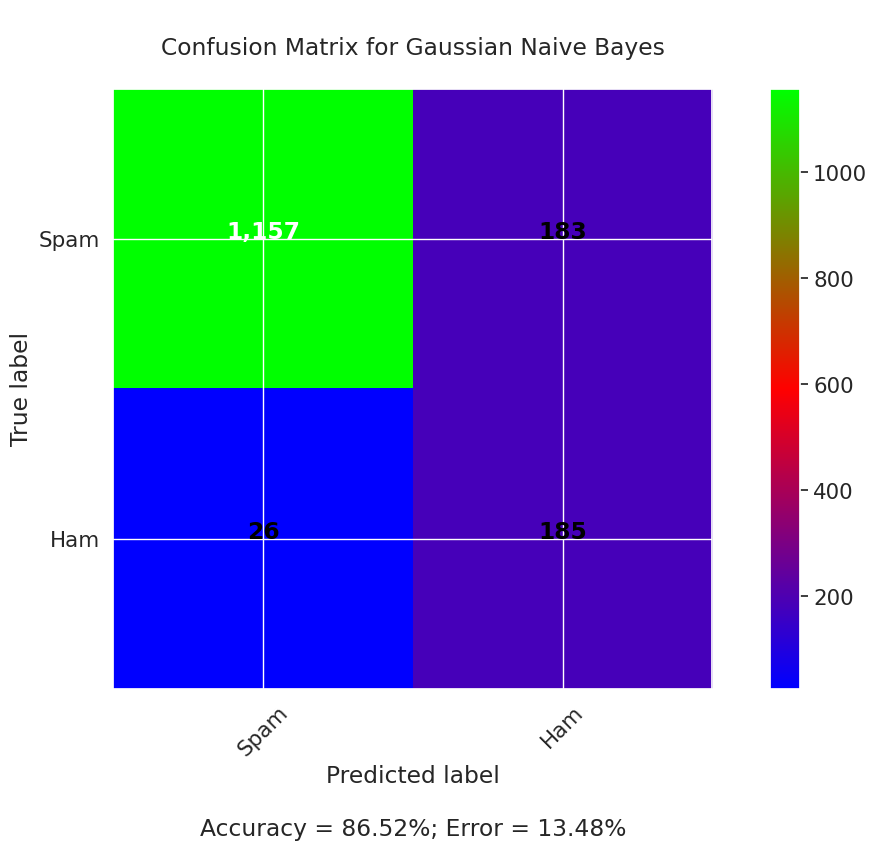

In [ ]:
plot_conf_matr(c_m_nb_gaussian, classes = ['Spam', 'Ham'], normalize=False, cmap= plt.cm.brg, title='Confusion Matrix for Gaussian Naive Bayes')

In [ ]:
print('\t\tStage IIb. Multinomial Naive Bayes\n')


nb_multinomial = MultinomialNB().fit(x_train, y_train)
y_pred_nb_multinomial = nb_multinomial.predict(x_test)
c_m_nb_multinomial = confusion_matrix(y_test, y_pred_nb_multinomial)
c_r_nb_multinomial = classification_report(y_test, y_pred_nb_multinomial)

print('The First Two Predicted Labels:', y_pred_nb_multinomial[0], y_pred_nb_multinomial[2], '\n')
print('\t\t\tClassification Report: \n\n', c_r_nb_multinomial, '\n')

		Stage IIb. Multinomial Naive Bayes

The First Two Predicted Labels: ham spam 

			Classification Report: 

               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1340
        spam       0.93      0.95      0.94       211

    accuracy                           0.98      1551
   macro avg       0.96      0.97      0.96      1551
weighted avg       0.98      0.98      0.98      1551
 



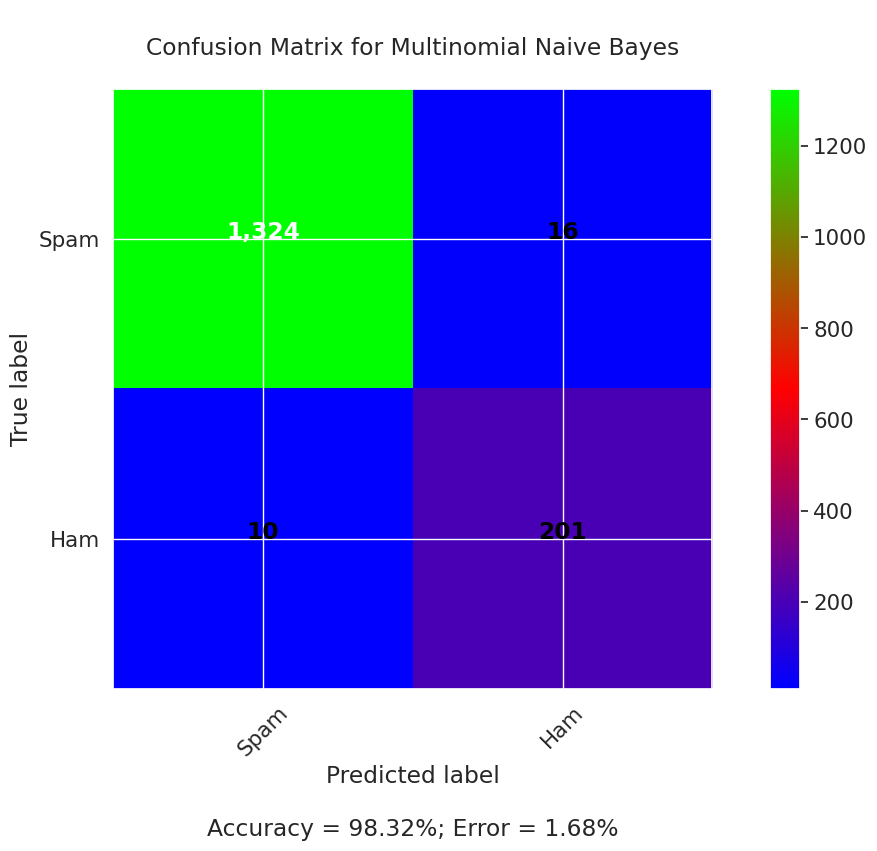

In [ ]:
plot_conf_matr(c_m_nb_multinomial, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for Multinomial Naive Bayes')
plt.show()

**2. Decision Tree Classifier**

In [ ]:
print('\t\tStage III. Decision Tree Classifier\n')

dtc = DecisionTreeClassifier(random_state=seed).fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
c_m_dtc = confusion_matrix(y_test, y_pred_dtc)
c_r_dtc = classification_report(y_test, y_pred_dtc)

print('The First Two Predicted Labels:', y_pred_dtc[0], y_pred_dtc[2], '\n')
print('\t\t\tClassification Report:\n\n', c_r_dtc, '\n')

		Stage III. Decision Tree Classifier

The First Two Predicted Labels: ham spam 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1340
        spam       0.89      0.85      0.87       211

    accuracy                           0.96      1551
   macro avg       0.93      0.92      0.92      1551
weighted avg       0.96      0.96      0.96      1551
 



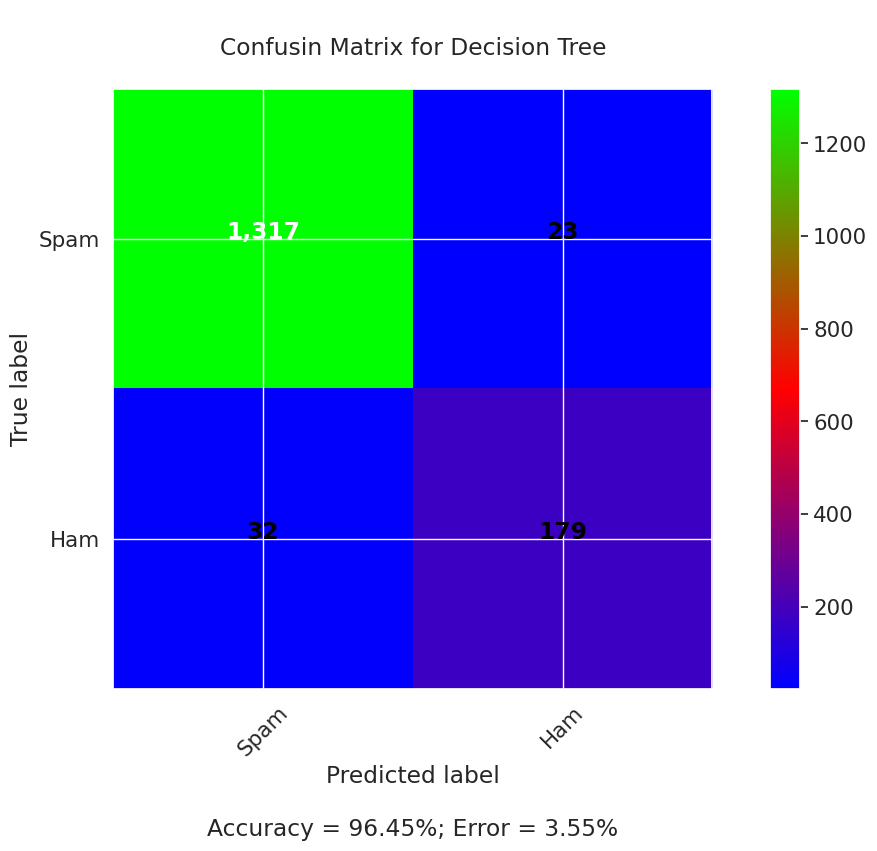

In [ ]:
plot_conf_matr(c_m_dtc, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusin Matrix for Decision Tree')

**3. Logistic Regression**

In [ ]:
print('\t\tStage IV. Logistic Regression\n')

lr = LogisticRegression(random_state=seed, solver='liblinear').fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
c_m_lr = confusion_matrix(y_test, y_pred_lr)
c_r_lr = classification_report(y_test, y_pred_lr)

print('The First Two Predicted Labels:', y_pred_lr[0], y_pred_lr[2], '\n')
print('\t\t\tClassification Report:\n\n', c_r_lr, '\n')

		Stage IV. Logistic Regression

The First Two Predicted Labels: ham spam 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1340
        spam       0.96      0.89      0.92       211

    accuracy                           0.98      1551
   macro avg       0.97      0.94      0.95      1551
weighted avg       0.98      0.98      0.98      1551
 



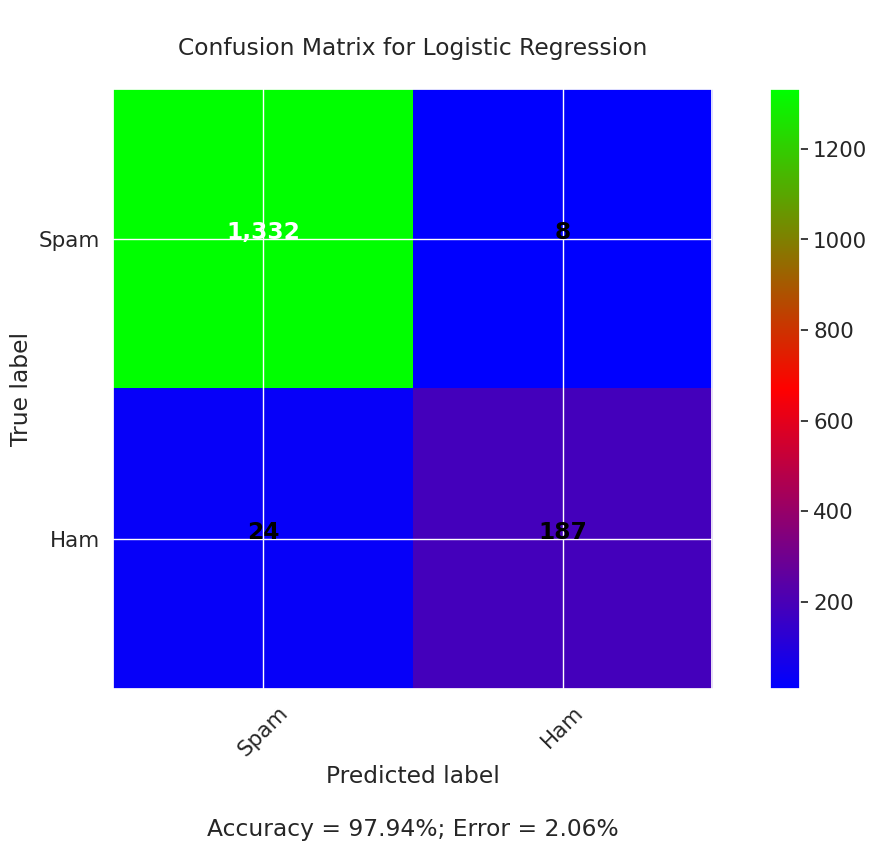

In [ ]:
plot_conf_matr(c_m_lr, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for Logistic Regression')

**4. K-Nearest Neighbors (KNN)**

In [ ]:
print('\t\tStage V. K-Nearest Neighbors (KNN)\n')

knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
c_m_knn = confusion_matrix(y_test, y_pred_knn)
c_r_knn = classification_report(y_test, y_pred_knn)

print('The First Two Predicted Label:', y_pred_knn[0], y_pred_knn[1], '\n')
print('\t\t\tClassification Report:\n\n', c_r_knn, '\n')

		Stage V. K-Nearest Neighbors (KNN)

The First Two Predicted Label: ham ham 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1340
        spam       0.96      0.68      0.79       211

    accuracy                           0.95      1551
   macro avg       0.96      0.84      0.88      1551
weighted avg       0.95      0.95      0.95      1551
 



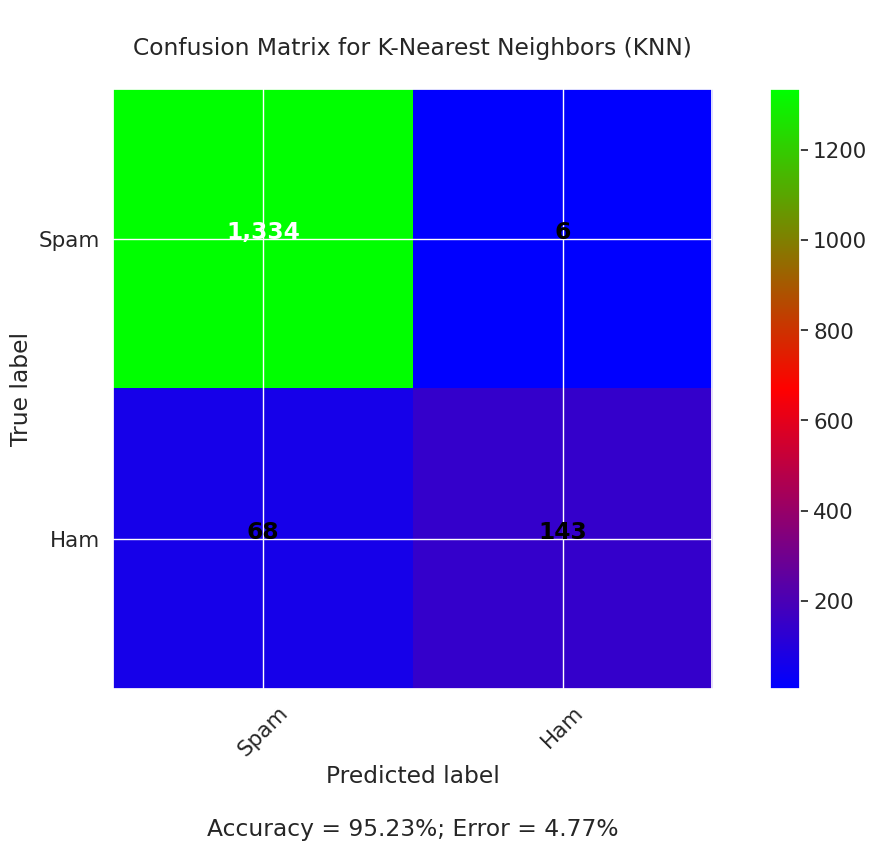

In [ ]:
plot_conf_matr(c_m_knn, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.show()

**5. Support Vector Machine Classification**

In [ ]:
print('\t\tStage VI. Support Vector Machine Classification\n')

svc = SVC(probability=True, random_state=seed).fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
c_m_svc = confusion_matrix(y_test, y_pred_svc)
c_r_svc = classification_report(y_test, y_pred_svc)

print('The First Two Predicted Labels:', y_pred_svc[0], y_pred_svc[1], '\n')
print('\t\t\tClassification Report:\n\n', c_r_svc, '\n')

		Stage VI. Support Vector Machine Classification

The First Two Predicted Labels: ham ham 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1340
        spam       0.98      0.84      0.91       211

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551
 



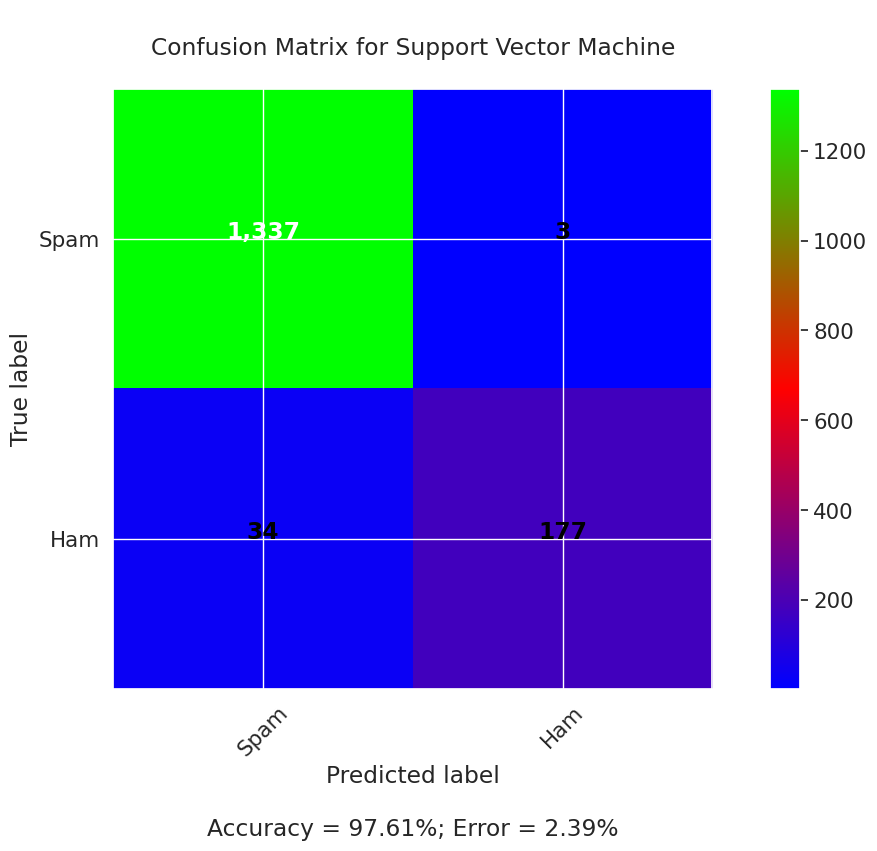

In [ ]:
plot_conf_matr(c_m_svc, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for Support Vector Machine')
plt.show()

**6. Gradient Boosting Classifier**

In [ ]:
print('\t\tStage VII. Gradient Boosting Classifier \n')

gbc = GradientBoostingClassifier(random_state=seed).fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)
c_m_gbc = confusion_matrix(y_test, y_pred_gbc)
c_r_gbc = classification_report(y_test, y_pred_gbc)

print('The First Two Predicted Labels:', y_pred_gbc[0], y_pred_gbc[1], '\n')
print('\t\t\tClassification Report:\n\n', c_r_gbc, '\n')

		Stage VII. Gradient Boosting Classifier 

The First Two Predicted Labels: ham ham 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1340
        spam       0.96      0.82      0.88       211

    accuracy                           0.97      1551
   macro avg       0.96      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551
 



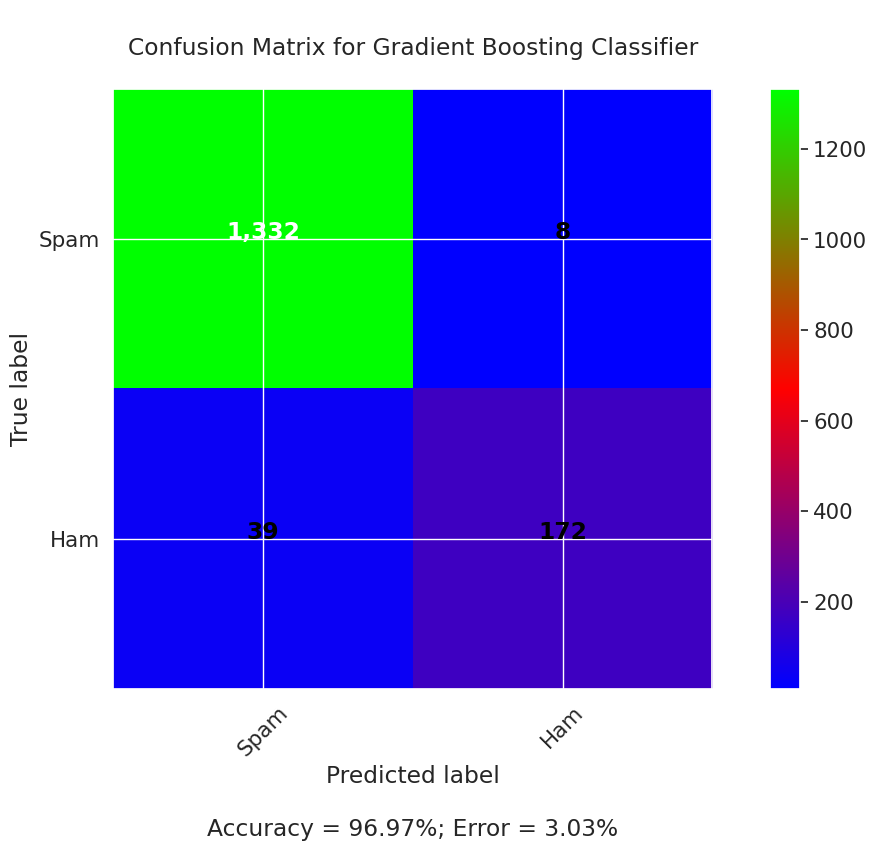

In [ ]:
plot_conf_matr(c_m_gbc, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for Gradient Boosting Classifier')
plt.show()

**7. Bagging Classifier**

In [ ]:
print('\t\tStage VIII. Bagging Classiffier\n')

bc = BaggingClassifier(svc, n_estimators=6).fit(x_train, y_train)
y_pred_bc = bc.predict(x_test)
c_m_bc = confusion_matrix(y_test, y_pred_bc)
c_r_bc = classification_report(y_test, y_pred_bc)

print('The Firts Two Predicted Labels:', y_pred_bc[0], y_pred_bc[1], '\n')
print('\t\t\tClassification Report:\n\n', c_r_bc, '\n')

		Stage VIII. Bagging Classiffier

The Firts Two Predicted Labels: ham ham 

			Classification Report:

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1340
        spam       0.97      0.89      0.93       211

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551
 



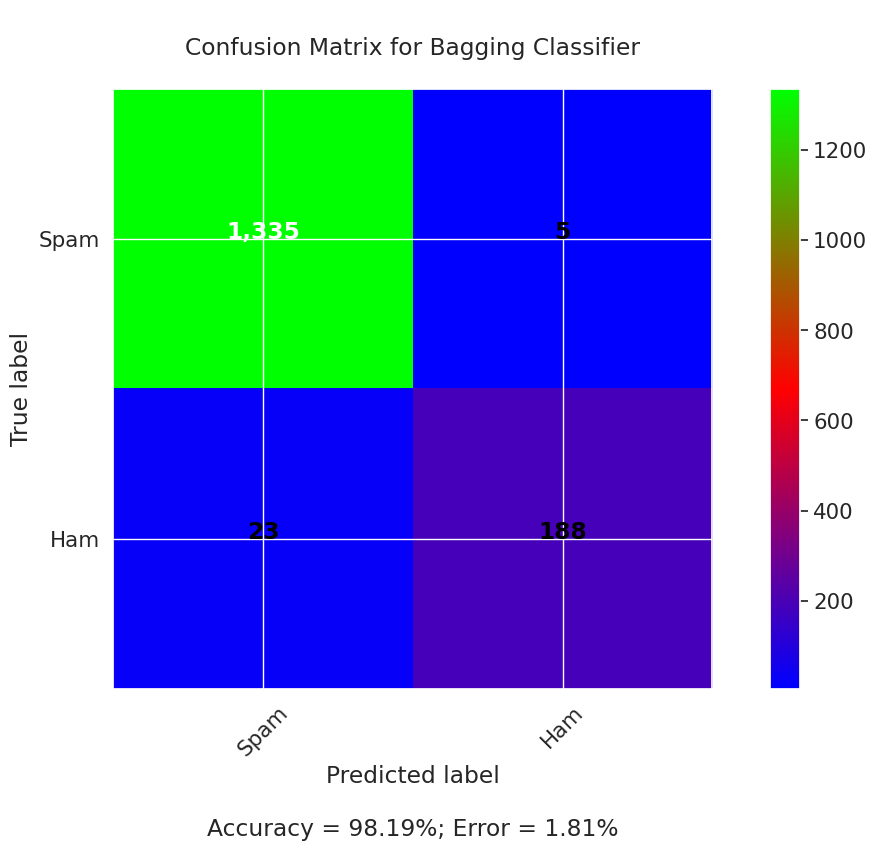

In [ ]:
plot_conf_matr(c_m_bc, classes=['Spam','Ham'], normalize=False, cmap=plt.cm.brg, title='Confusion Matrix for Bagging Classifier')